In [1]:
from AnomalousCommunityDetection.BiPartiteNetwork.BiPartiteConverter import BiPartiteConverter
from AnomalousCommunityDetection.BiPartiteNetwork import BiPartiteUtils 

from AnomalyInfusedCommunityStructuredRandomNetworkGenerator.AnomalyInfusedCommunityStructuredRandomNetworkGenerator import AnomalyInfusedCommunityStructuredRandomNetworkGenerator

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph, barabasi_albert_graph
import numpy as np
import random
import json

%matplotlib inline  

In [4]:
random_seed = 1

In [25]:
norm_comm_alg = barabasi_albert_graph
anom_comm_alg = erdos_renyi_graph
p_inter = 0.3
k_min = 1
k_max = 2

In [26]:
normal_community_sizes = [10]*3
normal_m = 1

In [27]:
simulator = AnomalyInfusedCommunityStructuredRandomNetworkGenerator(norm_comm_alg, anom_comm_alg, p_inter, k_min, k_max, random_seed)

In [28]:
G = simulator.generate_partition_graph(normal_community_sizes, normal_m)

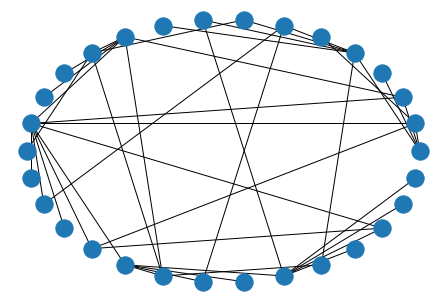

In [29]:
nx.draw_shell(G)

In [30]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30))

In [31]:
simulator.partitions

[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10},
 {11, 12, 13, 14, 15, 16, 17, 18, 19, 20},
 {21, 22, 23, 24, 25, 26, 27, 28, 29, 30}]

In [32]:
simulator.updated_partitions

[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 26},
 {3, 7, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 28},
 {7, 9, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30}]

In [33]:
parts = simulator.get_partitions()
parts

{'comm01': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '12',
  '15',
  '20',
  '26'],
 'comm02': ['3',
  '7',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '22',
  '28'],
 'comm03': ['7',
  '9',
  '15',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30']}

In [34]:
simulator.save_partitions('shit.json')

In [35]:
with open('shit.json', 'r') as file:
    user_dict = json.load(file)

In [36]:
user_dict

{'comm01': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '12',
  '15',
  '20',
  '26'],
 'comm02': ['3',
  '7',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '22',
  '28'],
 'comm03': ['7',
  '9',
  '15',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30']}

In [37]:
user_dict['comm01']

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '12', '15', '20', '26']

## Check BiPartiteConverter against old graph generator to bipartite method

In [38]:
convertor = BiPartiteConverter('shit.json')

In [39]:
BPG = convertor.generate_bipartite_graph(['comm01', 'comm02', 'comm03'], )

In [40]:
BPG.edges

EdgeView([('comm01', '1'), ('comm01', '2'), ('comm01', '3'), ('comm01', '4'), ('comm01', '5'), ('comm01', '6'), ('comm01', '7'), ('comm01', '8'), ('comm01', '9'), ('comm01', '10'), ('comm01', '12'), ('comm01', '15'), ('comm01', '20'), ('comm01', '26'), ('comm02', '3'), ('comm02', '7'), ('comm02', '11'), ('comm02', '12'), ('comm02', '13'), ('comm02', '14'), ('comm02', '15'), ('comm02', '16'), ('comm02', '17'), ('comm02', '18'), ('comm02', '19'), ('comm02', '20'), ('comm02', '22'), ('comm02', '28'), ('comm03', '7'), ('comm03', '9'), ('comm03', '15'), ('comm03', '20'), ('comm03', '21'), ('comm03', '22'), ('comm03', '23'), ('comm03', '24'), ('comm03', '25'), ('comm03', '26'), ('comm03', '27'), ('comm03', '28'), ('comm03', '29'), ('comm03', '30')])

In [41]:
BPG.nodes

NodeView(('comm01', 'comm02', 'comm03', '3', '22', '23', '8', '28', '12', '4', '24', '25', '11', '21', '30', '15', '19', '20', '1', '5', '13', '9', '14', '10', '27', '6', '17', '2', '26', '18', '7', '16', '29'))

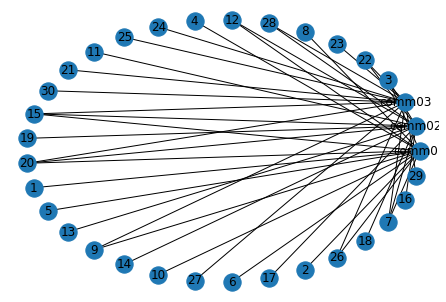

In [42]:
nx.draw_shell(BPG, with_labels=True)

In [43]:
BiPartiteUtils.get_bipartite_properties(BPG)

{'partite_1_num_nodes': 3,
 'partite_2_num_nodes': 30,
 'partite_1_label': 'Community',
 'partite_2_label': 'Vertex',
 'total_nodes': 33,
 'total_edges': 42}

In [44]:
BiPartiteUtils.print_bipartite_properties(BPG)

BiPartite graph properties:
	Number of 'Community'-partite nodes: 3
	Number of 'Vertex'-partite nodes: 30
	Total number of nodes: 33
	Total number of edges: 42
